In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [83]:
df = pd.read_csv('/content/electric_vehicles_spec_2025.csv/electric_vehicles_spec_2025.csv.csv')

print(df.head())
print(df.isnull().sum())
drop_cols = ['brand', 'model', 'battery_type', 'segment', 'car_body_type', 'source_url']
df = df.drop(columns=drop_cols)

df = df.dropna()

    brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towing_capacity_kg cargo_volume_l  seats  \
0                   7.0  ...  

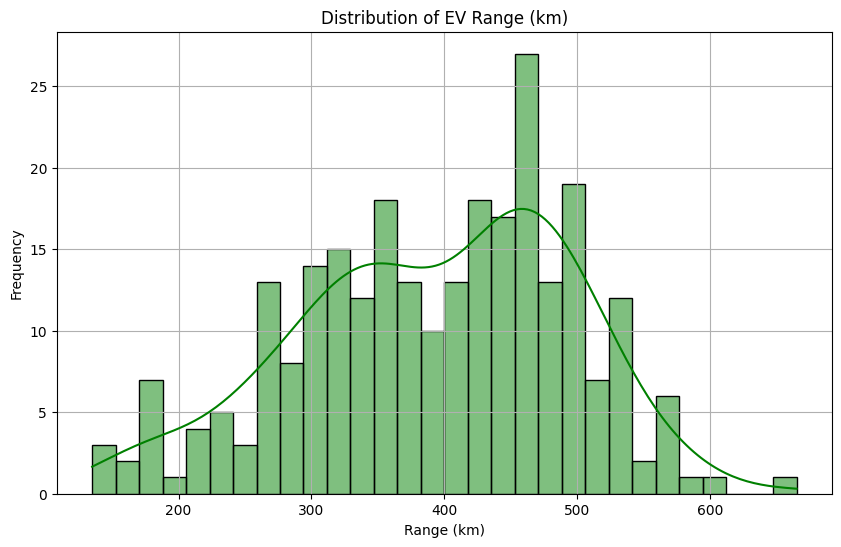

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['range_km'], bins=30, kde=True, color='green')
plt.title('Distribution of EV Range (km)')
plt.xlabel('Range (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [85]:
X = df.drop(columns=['range_km'])
y = df['range_km']

X['cargo_volume_l'] = pd.to_numeric(X['cargo_volume_l'], errors='coerce')

X = X.dropna()
y = y[X.index]
X = pd.get_dummies(X, columns=['fast_charge_port', 'drivetrain'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

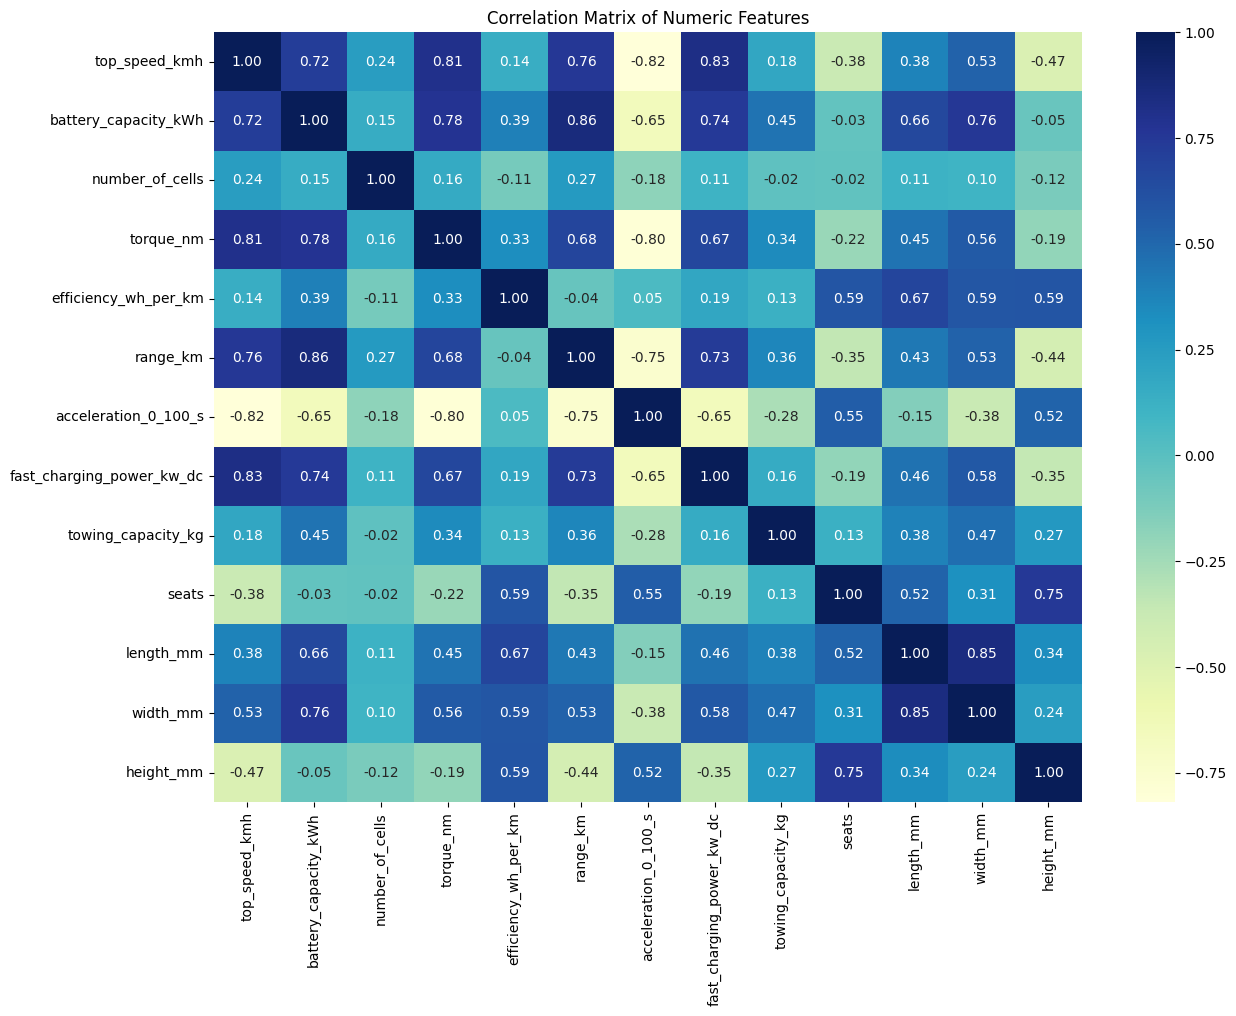

In [86]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [87]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

meta_model = LinearRegression()

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    cv=5,
    n_jobs=-1
)





In [94]:
stacking_model.fit(X_train, y_train)

y_pred_stack = stacking_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mae = mean_absolute_error(y_test, y_pred_stack)
r2 = r2_score(y_test, y_pred_stack)

print(f"📊 StackingRegressor Performance:")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.4f}")

📊 StackingRegressor Performance:
✅ RMSE: 15.44
✅ MAE: 12.15
✅ R² Score: 0.9766


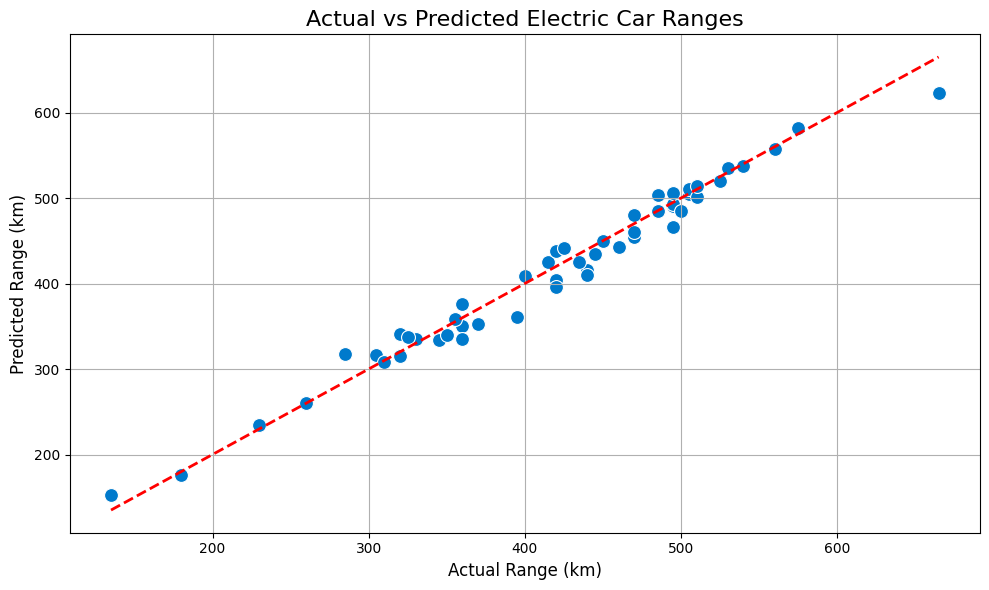

In [89]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_stack, color="#007ACC", edgecolor='white', s=100)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title("Actual vs Predicted Electric Car Ranges", fontsize=16)
plt.xlabel("Actual Range (km)", fontsize=12)
plt.ylabel("Predicted Range (km)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-90-2726054674.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='drivetrain', y='range_km', estimator='mean', ci=None)


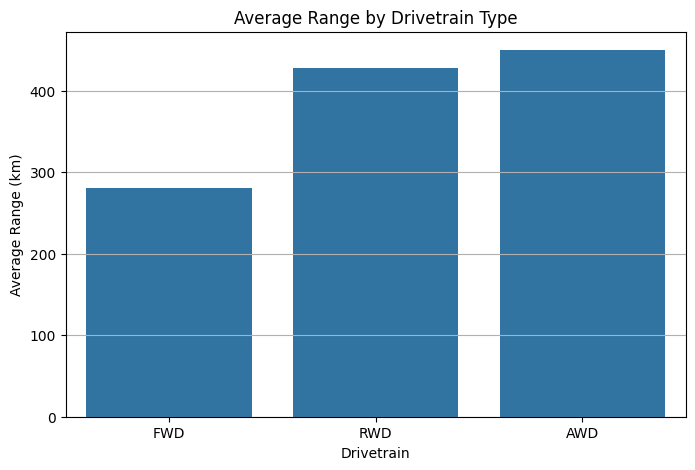

In [90]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='drivetrain', y='range_km', estimator='mean', ci=None)
plt.title('Average Range by Drivetrain Type')
plt.xlabel('Drivetrain')
plt.ylabel('Average Range (km)')
plt.grid(axis='y')
plt.show()

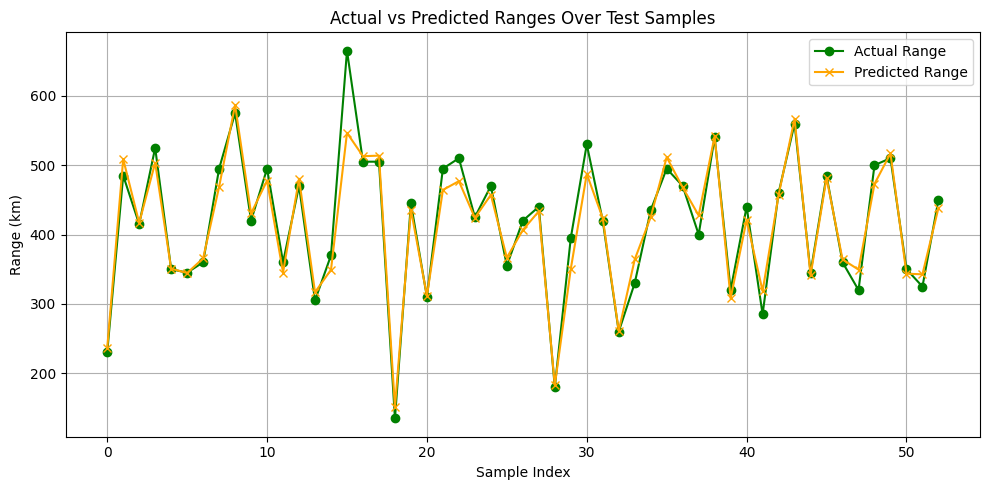

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Range', color='green', marker='o')
plt.plot(y_pred, label='Predicted Range', color='orange', marker='x')
plt.title('Actual vs Predicted Ranges Over Test Samples')
plt.xlabel('Sample Index')
plt.ylabel('Range (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
# ** Shenouda Safwat **